In [1]:
import pandas as pd

import seaborn as sns
#import matplotlib.pylab as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 8)

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pd.read_excel("c:/testData.xlsx")
pd.options.display.max_columns = None
# display all DataFrame columns to check with my own eyes

data.columns = ['barId', 'date', 'segment', 'draughtV', 'packagedV',
                'totalV', 'totalR', 'beerR', 'beerU', 'spiritsR',
                'spiritsU', 'foodR', 'nonAlcoholR', 'wineR', 'sojuR', 
                'sojuU', 'beerO', 'beerFoodO', 'sojuBeerO', 'sojuFoodO',
               'avgCheck', 'sojuP']
# change column names to index easily

data.head()

,barId,date,segment,draughtV,packagedV,totalV,totalR,beerR,beerU,spiritsR,spiritsU,foodR,nonAlcoholR,wineR,sojuR,sojuU,beerO,beerFoodO,sojuBeerO,sojuFoodO,avgCheck,sojuP
0,Bar 1,2017-07-01,"Food,Spirits",9.3,6.16,15.46,887100,124500,22,278000,68,461100,23500,0,54000,12,14,14,1,7,26881.818182,4500.0
1,Bar 1,2017-07-02,"Food,Spirits",21.3,2.50,23.80,745800,167500,16,256000,63,298300,24000,0,18000,4,7,7,1,2,46612.500000,4500.0
2,Bar 1,2017-07-03,"Food,Spirits",9.3,2.50,11.80,575100,87000,12,237000,57,234100,10000,0,27000,5,7,7,2,4,26140.909091,5625.0
3,Bar 1,2017-07-04,"Food,Spirits",15.9,7.50,23.40,553500,178000,26,146000,35,222500,4000,0,27000,5,12,12,2,4,34593.750000,5625.0
4,Bar 1,2017-07-05,"Food,Spirits",1.7,8.00,9.70,256600,84000,17,80500,20,92100,0,0,4500,1,7,7,1,1,28511.111111,4500.0


### variable selection

In [59]:
test_set = data[['barId', 'date', 'draughtV', 'packagedV', 'totalR', 'beerU',
                 'spiritsU', 'foodR', 'nonAlcoholR', 'wineR', 'sojuU', 'beerO']]
# for segmentation only
test_set = test_set.groupby('barId', as_index=False).mean()
test_set.head()

,barId,draughtV,packagedV,totalR,beerU,spiritsU,foodR,nonAlcoholR,wineR,sojuU,beerO
0,Bar 1,15.853285,10.282628,1.115376e+06,40.854015,90.912409,478606.197080,30362.598540,0.0,43.357664,16.583942
1,Bar 10,20.902222,3.758128,4.364050e+05,63.977778,5.072222,129551.111111,4877.777778,0.0,4.772222,17.183333
2,Bar 100,20.261261,2.744054,3.280270e+05,45.414414,6.990991,136504.504505,1792.792793,0.0,6.747748,10.576577
3,Bar 101,4.188333,4.689167,1.877052e+06,137.217949,7.987179,626038.461538,16794.871795,0.0,0.000000,26.205128
4,Bar 102,22.316154,7.324188,2.777787e+06,155.239316,25.495726,871358.974359,24760.683761,0.0,15.008547,31.290598


In [33]:
# kmeans separates distances
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [25]:
def scaling(column):
    tmp = StandardScaler()
    tmp.fit(np.array(column).reshape(-1,1))
    return pd.DataFrame(tmp.transform(np.array(column).reshape(-1,1)), columns=[column.name])

In [52]:
def scaling(column):
    tmp = scale(column)
    return pd.DataFrame(tmp, columns=[column.name])

In [55]:
test_set_scaled = test_set[:]
for column in test_set.iloc[:,1:].columns:
    test_set_scaled.loc[:,column] = scaling(test_set[column])

In [56]:
test_set_scaled

,barId,draughtV,packagedV,totalR,beerU,spiritsU,foodR,nonAlcoholR,wineR,sojuU,beerO
0,Bar 1,-0.237163,0.876999,-0.109887,-0.322030,1.671653,-0.305667,0.036805,-0.206343,1.323692,-0.013075
1,Bar 10,-0.043560,-0.284474,-0.699556,0.080949,-0.574689,-0.699932,-0.495855,-0.206343,-0.650751,0.025661
2,Bar 100,-0.068138,-0.464996,-0.793680,-0.242556,-0.524477,-0.692078,-0.560335,-0.206343,-0.549662,-0.401297
3,Bar 101,-0.684460,-0.118733,0.551609,1.357311,-0.498408,-0.139139,-0.246775,-0.206343,-0.894949,0.608689
4,Bar 102,0.010658,0.350346,1.333873,1.671371,-0.040229,0.137956,-0.080281,-0.206343,-0.126952,0.937334
5,Bar 103,0.050981,0.710358,0.022076,0.039896,1.871139,-0.231948,-0.092560,-0.206343,4.018645,0.335408
6,Bar 104,0.377462,0.093612,0.324209,0.218623,-0.307331,0.507344,-0.282671,-0.206343,-0.122841,0.112186
7,Bar 105,-0.833444,-0.597450,-0.747733,-0.956894,-0.367625,-0.504232,-0.580072,-0.206343,-0.460774,-0.983949
8,Bar 106,-0.532978,-0.235275,-0.503588,-0.594137,0.165570,-0.430992,-0.503751,0.331895,0.613563,-0.578147
9,Bar 107,-0.402115,0.423211,0.829963,-0.033107,0.783124,0.479056,-0.371126,-0.206343,1.381882,-0.090785


___

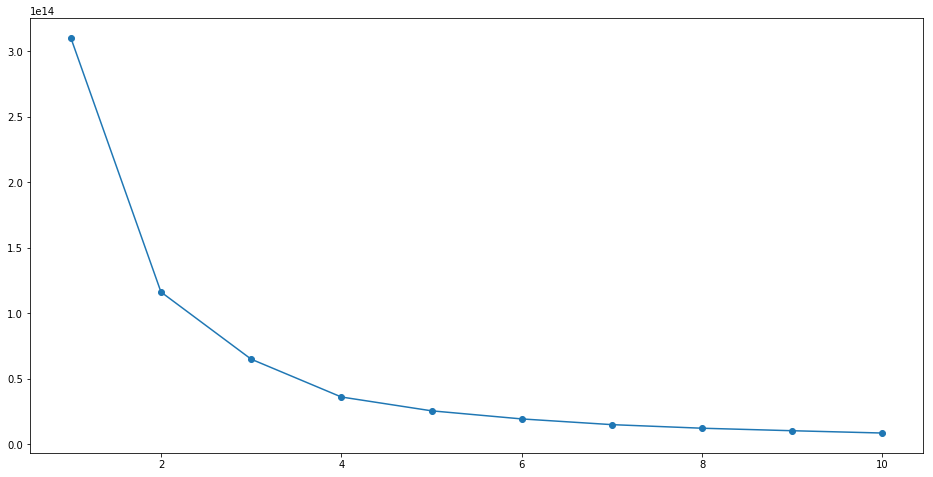

In [60]:
inertias = []

for k in range(10):
    model = KMeans(n_clusters=k+1)
    model.fit(test_set.iloc[:,1:])
    inertias.append(model.inertia_)
    
plt.plot(range(1,11), inertias, '-o')
    

In [63]:
data[['beerO', 'beerFoodO']].corr()

,beerO,beerFoodO
beerO,1.000000,0.990962
beerFoodO,0.990962,1.000000


C:\Programming\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Sales trend by the type of beverage')

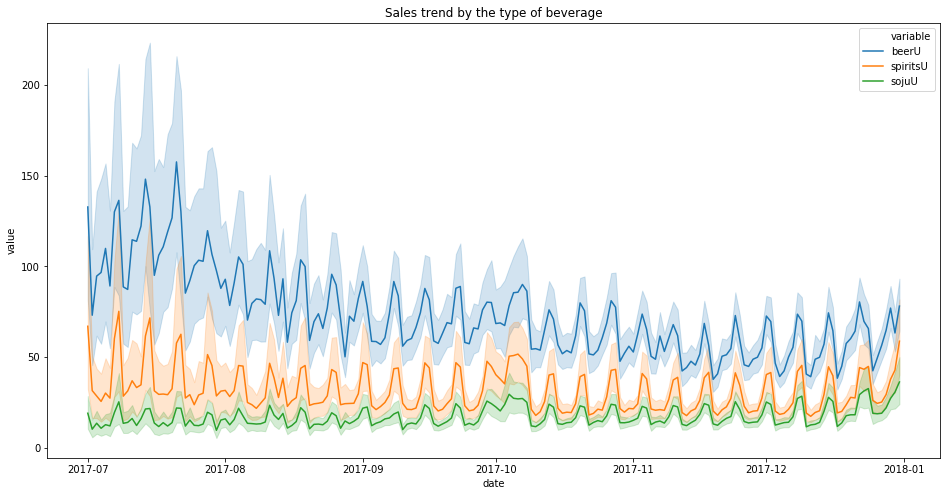

In [64]:
dataLong = data.melt(['barId', 'date', 'segment'])
# convert data into long format to easily visualize
sns.lineplot(data=dataLong[dataLong['variable'].isin(['sojuU', 'beerU', 'spiritsU'])], x = 'date', y='value', hue='variable')
plt.title("Sales trend by the type of beverage")

In [66]:
data['bevR'] = data.beerR + data.spiritsR + data.wineR

C:\Programming\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Sales trend by the type of order')

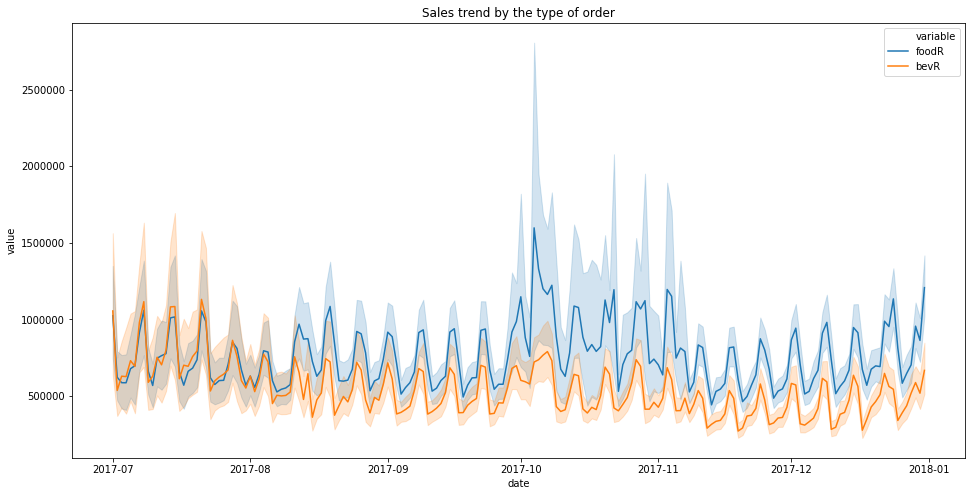

In [67]:
dataLong = data.melt(['barId', 'date', 'segment'])
# convert data into long format to easily visualize
sns.lineplot(data=dataLong[dataLong['variable'].isin(['foodR', 'bevR'])], x = 'date', y='value', hue='variable')
plt.title("Sales trend by the type of order")

C:\Programming\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Sales trend by the type of order')

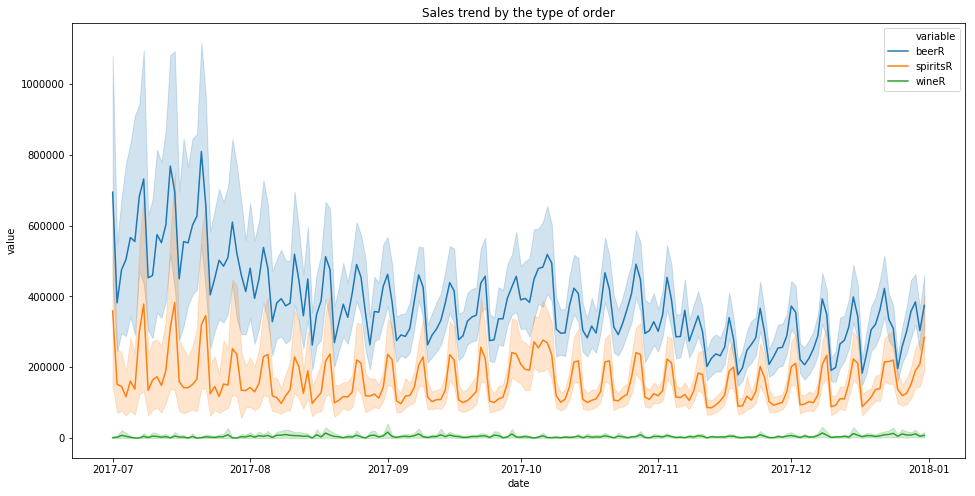

In [68]:
sns.lineplot(data=dataLong[dataLong['variable'].isin(['beerR', 'spiritsR', 'wineR'])], x = 'date', y='value', hue='variable')
plt.title("Sales trend by the type of order")

C:\Programming\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


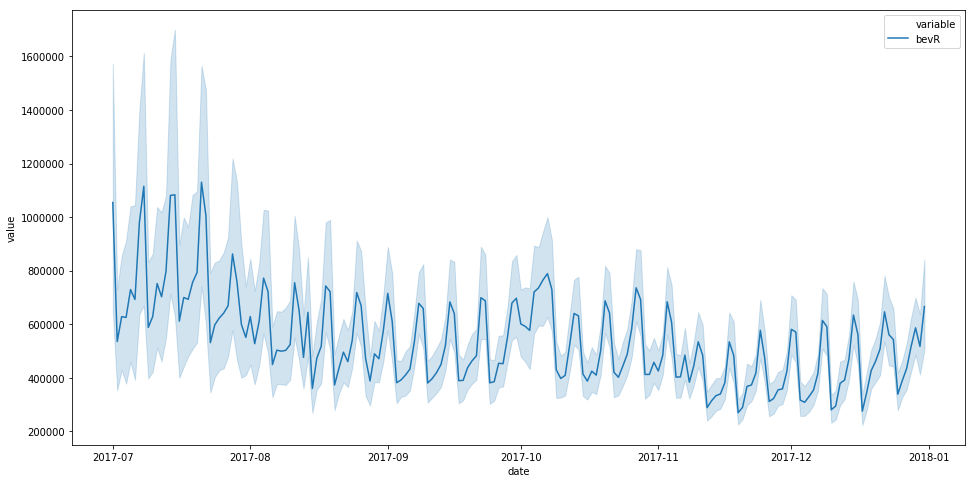

In [70]:
sns.lineplot(data=dataLong[dataLong['variable'].isin(['bevR'])], x = 'date', y='value', hue='variable')